# Predictive Modeling Notebook

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load feature-engineered data
data_path = './data/processed/feature_engineered_data.csv'
df = pd.read_csv(data_path)

In [2]:
# 1. Define Features and Target
# Using 'yield_per_area' as a proxy for soil productivity/erosion risk
features = ['population_density', 'yield_per_area', 'pest_intensity', 'tempChange(C)', 'rainfall']
X = df[features]
y = df['yield_per_area']  # Target variable

In [3]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 3. Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
# 4. Model Evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Model Evaluation Metrics:
RMSE: 203.63099667831185
R2 Score: 0.3307849142302801


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [6]:
# 5. Feature Importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

/tmp/ipykernel_587/2495465366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


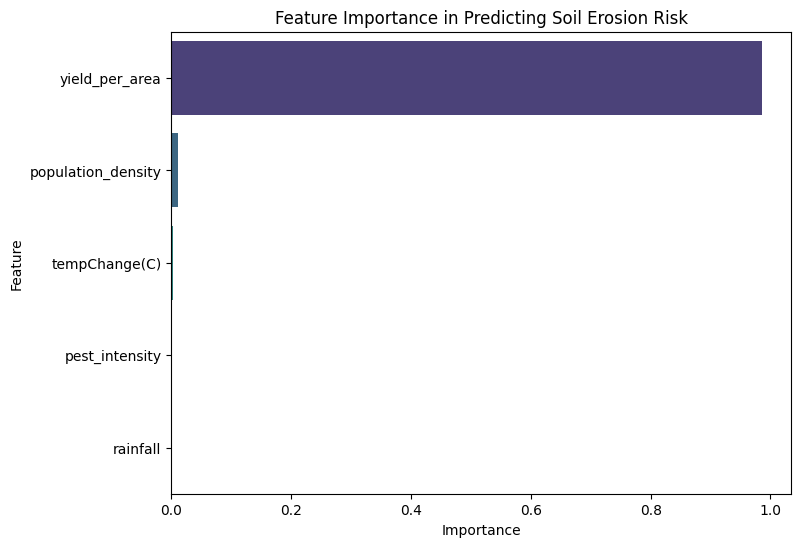

In [7]:
# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance in Predicting Soil Erosion Risk')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [9]:
joblib.dump(model, './models/random_forest_model.pkl')

['./models/random_forest_model.pkl']